In [ ]:
pip install pandas scikit-learn nltk

In [ ]:
import pandas as pd

# Download the dataset
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df = pd.read_csv(url)

# Save it locally if needed
df.to_csv("labeled_data.csv", index=False)

# Display the first few rows
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("labeled_data.csv")

In [ ]:
df = df.rename(columns={"class": "label", "tweet": "text"})

In [ ]:
label_map = {0: "Hate Speech", 1: "Offensive", 2: "Neutral"}
df['label'] = df['label'].map(label_map)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8926770223925762
Classification Report:
               precision    recall  f1-score   support

 Hate Speech       0.54      0.18      0.27       290
     Neutral       0.84      0.82      0.83       835
   Offensive       0.91      0.96      0.94      3832

    accuracy                           0.89      4957
   macro avg       0.76      0.65      0.68      4957
weighted avg       0.88      0.89      0.88      4957



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv("labeled_data.csv")
df = df.rename(columns={"class": "label", "tweet": "text"})
df['label'] = df['label'].map({0: "Hate Speech", 1: "Offensive", 2: "Neutral"})

<ipython-input-15-6fbdd4b4ba2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


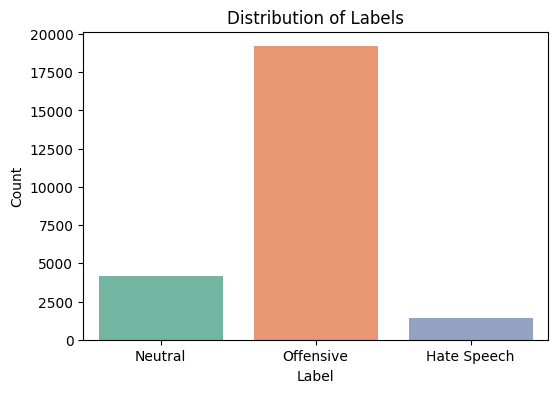

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

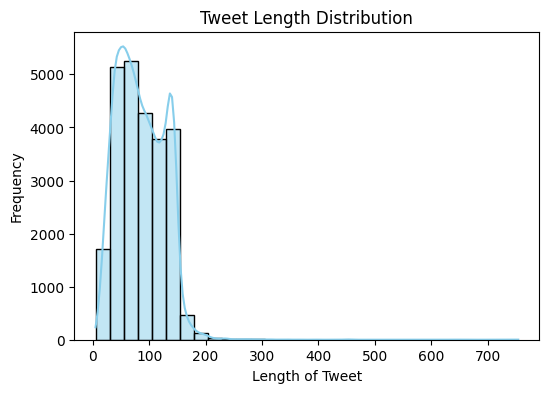

In [ ]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

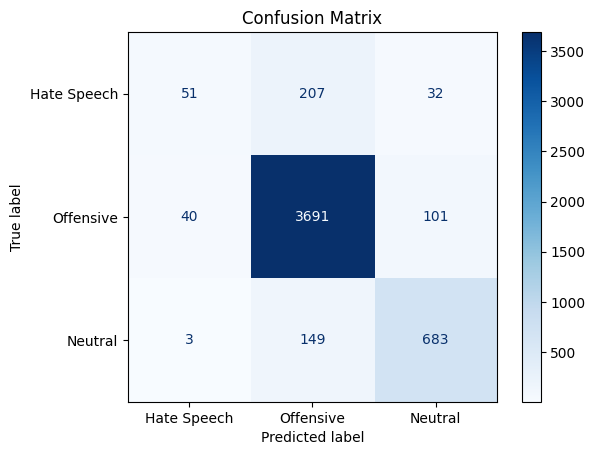

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=["Hate Speech", "Offensive", "Neutral"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hate Speech", "Offensive", "Neutral"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


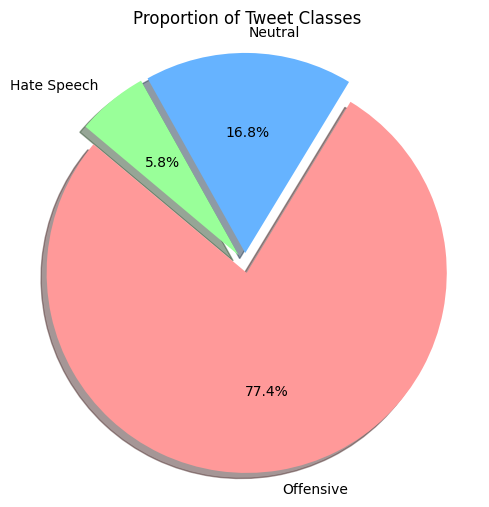

In [ ]:
import matplotlib.pyplot as plt

# Pie chart data
label_counts = df['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.05, 0.05, 0.05)  # Slightly explode all slices

# Create Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title("Proportion of Tweet Classes")
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()
